In [1]:
import idx2numpy
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# File paths
train_images_path = 'MNIST original/train-images.idx3-ubyte'
train_labels_path = 'MNIST original/train-labels.idx1-ubyte'
test_images_path = 'MNIST original/t10k-images.idx3-ubyte'
test_labels_path = 'MNIST original/t10k-labels.idx1-ubyte'

# Load the datasets
train_images = idx2numpy.convert_from_file(train_images_path)
train_labels = idx2numpy.convert_from_file(train_labels_path)
test_images = idx2numpy.convert_from_file(test_images_path)
test_labels = idx2numpy.convert_from_file(test_labels_path)

# Inspect data shapes, types and ranges
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)
print("Data type:", train_images.dtype)
print("Pixel value range:", train_images.min(), train_images.max())

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Data type: uint8
Pixel value range: 0 255


In [3]:
# Normalize the images by scaling pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


In [4]:
# Reshape the data if necessary (flattening the 28x28 images to 784-length vectors)
train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

In [5]:
# Split the dataset into training and testing sets (already split, but combining for example)
X = np.concatenate((train_images, test_images))
y = np.concatenate((train_labels, test_labels))

# Splitting the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [6]:
print("After split, train images shape:", X_train.shape)
print("After split, test images shape:", X_test.shape)


After split, train images shape: (56000, 784)
After split, test images shape: (14000, 784)


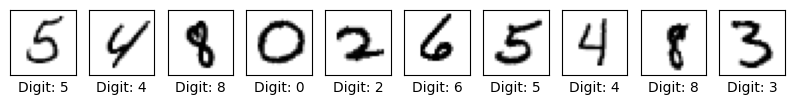

Displayed sample images from the dataset.


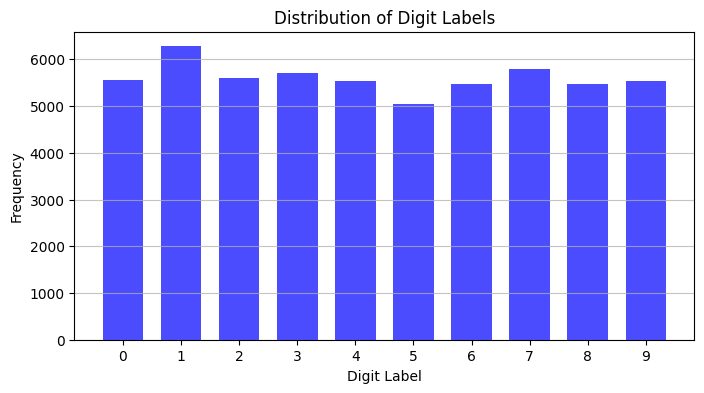

Displayed distribution of digit labels.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Display sample images from the dataset
images = X_train.reshape(-1, 28, 28)  # Reshape images to 28x28 if they are flattened
plt.figure(figsize=(10, 10))
for i in range(10):  # Display 10 images
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Digit: {y_train[i]}')
plt.show()
print("Displayed sample images from the dataset.")

# Analyze the distribution of labels with a histogram
plt.figure(figsize=(8, 4))
plt.hist(y_train, bins=np.arange(-0.5, 10, 1), rwidth=0.7, color='blue', alpha=0.7)
plt.title('Distribution of Digit Labels')
plt.xlabel('Digit Label')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 10))
plt.grid(axis='y', alpha=0.75)
plt.show()
print("Displayed distribution of digit labels.")

/var/folders/ly/lcy60wcx05s49bytn6_d_jfh0000gn/T/ipykernel_16738/3317657538.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=pixel_sums, palette="viridis")


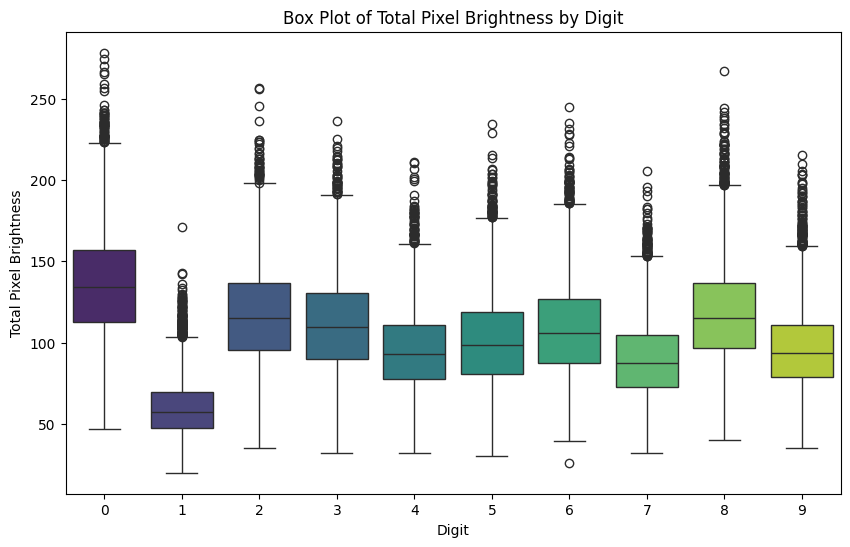

Box plot of total pixel brightness by digit displayed.


In [8]:
# Box Plot for the distribution of pixel sum by digit classes
pixel_sums = X_train.sum(axis=1)  # Sum of pixel values for each image
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_train, y=pixel_sums, palette="viridis")
plt.title('Box Plot of Total Pixel Brightness by Digit')
plt.xlabel('Digit')
plt.ylabel('Total Pixel Brightness')
plt.show()

print("Box plot of total pixel brightness by digit displayed.")

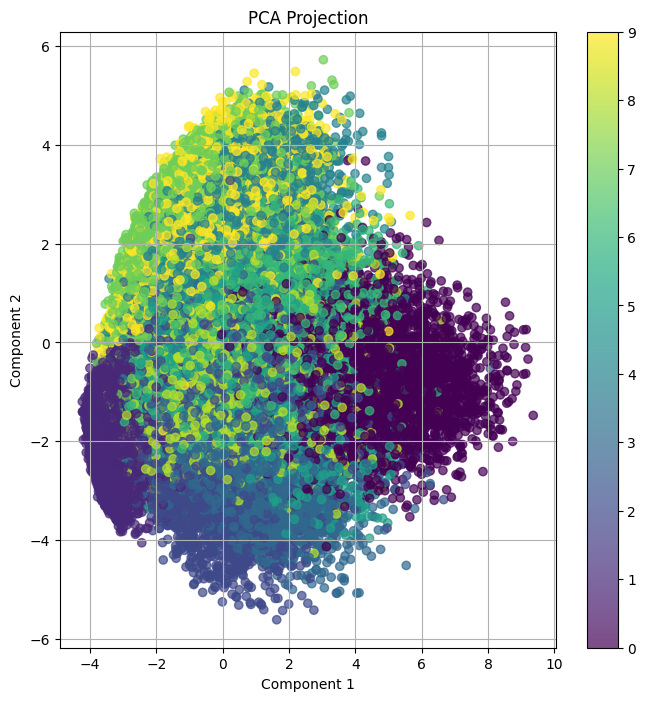

PCA projection displayed.


In [9]:
# Visualize data using PCA
pca = PCA(n_components=2)
projections = pca.fit_transform(X_train)
plt.figure(figsize=(8, 8))
scatter = plt.scatter(projections[:, 0], projections[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('PCA Projection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

print("PCA projection displayed.")


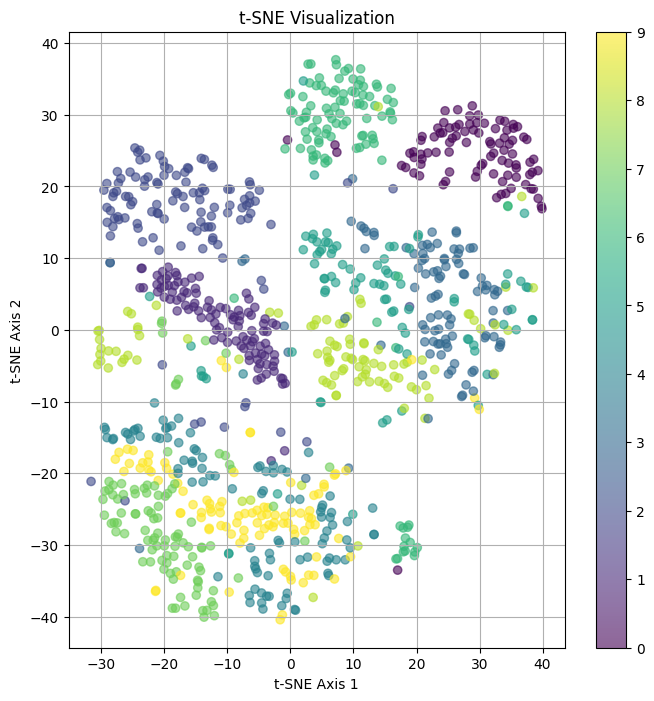

t-SNE visualization displayed.


In [10]:
# Visualize data using t-SNE
tsne = TSNE(n_components=2, random_state=42)
subset_indices = np.random.choice(X_train.shape[0], 1000, replace=False)
subset_images = X_train[subset_indices]
subset_labels = y_train[subset_indices]
tsne_results = tsne.fit_transform(subset_images)
plt.figure(figsize=(8, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=subset_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Axis 1')
plt.ylabel('t-SNE Axis 2')
plt.grid(True)
plt.show()
print("t-SNE visualization displayed.")

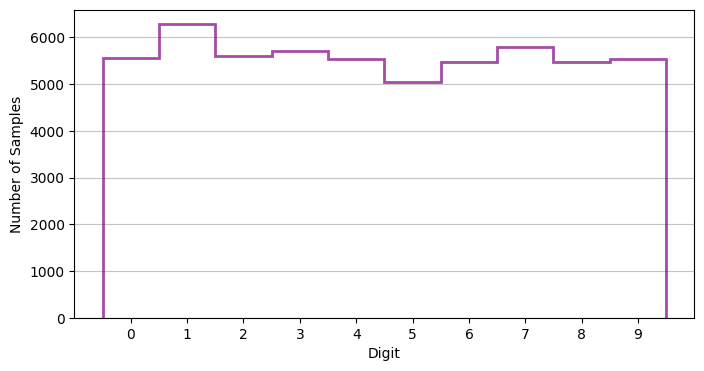

Histogram of samples per digit class displayed.


In [11]:
# Histogram of the number of samples per digit class
plt.figure(figsize=(8, 4))
plt.hist(y_train, bins=np.arange(-0.5, 10, 1), color='purple', alpha=0.7, histtype='step', linewidth=2)
plt.xlabel('Digit')
plt.ylabel('Number of Samples')
plt.xticks(np.arange(0, 10))
plt.grid(axis='y', alpha=0.75)
plt.show()
print("Histogram of samples per digit class displayed.")

In [12]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the k-Nearest Neighbors model
knn.fit(X_train, y_train)

print("\nTrained k-Nearest Neighbors")
print("k-NN training accuracy:", accuracy_score(y_train, knn.predict(X_train)))
print("k-NN test accuracy:", accuracy_score(y_test, knn.predict(X_test)))




Trained k-Nearest Neighbors
k-NN training accuracy: 0.9857678571428572
k-NN test accuracy: 0.9712857142857143


In [14]:
svm = SVC(gamma='scale')  # 'scale' automatically sets gamma based on the data

# Train the Support Vector Machine model
svm.fit(X_train, y_train)
print("\nTrained Support Vector Machine")
print("SVM training accuracy:", accuracy_score(y_train, svm.predict(X_train)))

print("SVM test accuracy:", accuracy_score(y_test, svm.predict(X_test)))



Trained Support Vector Machine
SVM training accuracy: 0.9899464285714286
SVM test accuracy: 0.9764285714285714


In [15]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=10) # Limiting depth to prevent overfitting
# Train the Decision Tree models
decision_tree.fit(X_train, y_train)
print("\nTrained Decision Tree")
print("Decision Tree training accuracy:", accuracy_score(y_train, decision_tree.predict(X_train)))

print("Decision Tree test accuracy:", accuracy_score(y_test, decision_tree.predict(X_test)))




Trained Decision Tree
Decision Tree training accuracy: 0.9049285714285714
Decision Tree test accuracy: 0.8567857142857143


In [16]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=10)  # Limiting depth here as well

# Train the Random Forest model
random_forest.fit(X_train, y_train)
print("\nTrained Random Forest")
print("Random Forest training accuracy:", accuracy_score(y_train, random_forest.predict(X_train)))

print("Random Forest test accuracy:", accuracy_score(y_test, random_forest.predict(X_test)))


Trained Random Forest
Random Forest training accuracy: 0.9669464285714285
Random Forest test accuracy: 0.9455


Results for k-Nearest Neighbors:
Accuracy: 0.9712857142857143
Precision: 0.9717774214531696
Recall: 0.9708657044620269
F1 Score: 0.9711991586660975

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.96      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.96      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



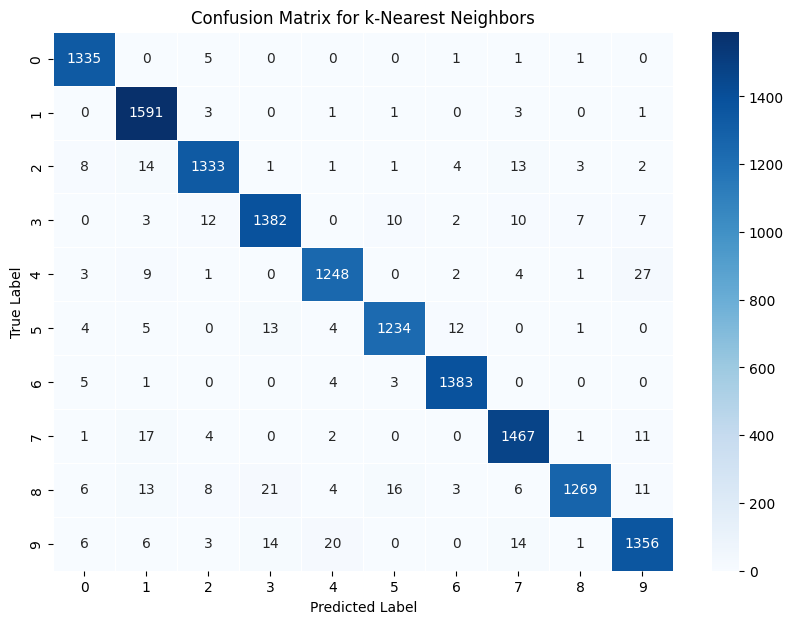

Results for Support Vector Machine:
Accuracy: 0.9764285714285714
Precision: 0.9763608291708306
Recall: 0.9762666612492419
F1 Score: 0.9762962373195112

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.96      0.97      1357
           9       0.97      0.96      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



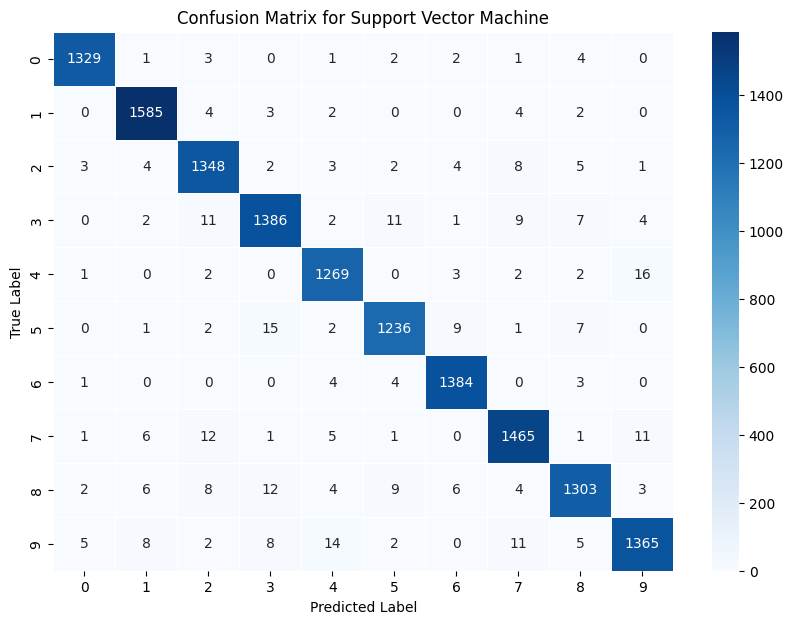

Results for Decision Tree:
Accuracy: 0.8567857142857143
Precision: 0.8556577297469211
Recall: 0.8548237920613267
F1 Score: 0.8549336450645324

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1343
           1       0.91      0.95      0.93      1600
           2       0.85      0.81      0.83      1380
           3       0.82      0.82      0.82      1433
           4       0.83      0.84      0.83      1295
           5       0.81      0.80      0.81      1273
           6       0.91      0.89      0.90      1396
           7       0.92      0.88      0.90      1503
           8       0.82      0.79      0.80      1357
           9       0.79      0.85      0.81      1420

    accuracy                           0.86     14000
   macro avg       0.86      0.85      0.85     14000
weighted avg       0.86      0.86      0.86     14000



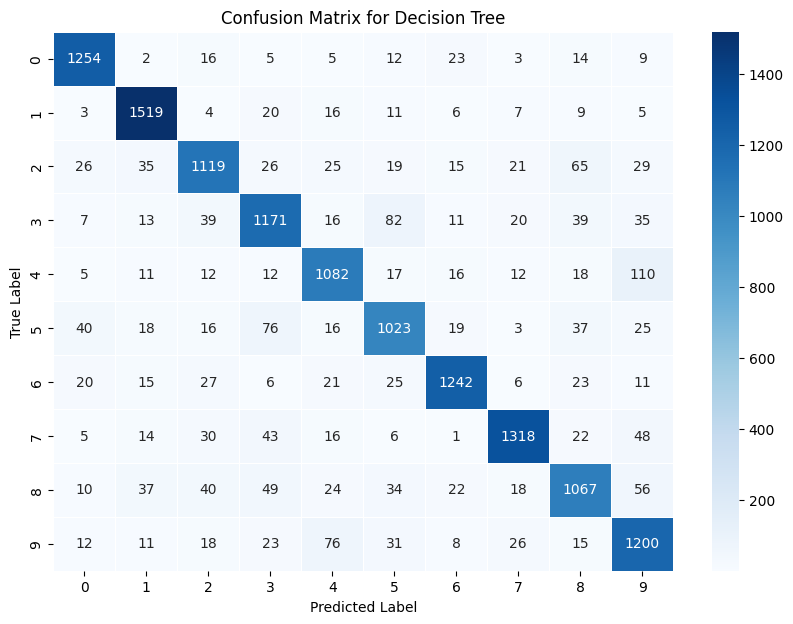

Results for Random Forest:
Accuracy: 0.9455
Precision: 0.9458580418214524
Recall: 0.9449825182534438
F1 Score: 0.9453008580198767

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.96      0.98      0.97      1600
           2       0.94      0.94      0.94      1380
           3       0.94      0.92      0.93      1433
           4       0.95      0.93      0.94      1295
           5       0.96      0.93      0.95      1273
           6       0.96      0.97      0.97      1396
           7       0.95      0.93      0.94      1503
           8       0.94      0.92      0.93      1357
           9       0.89      0.93      0.91      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.94      0.95     14000
weighted avg       0.95      0.95      0.95     14000



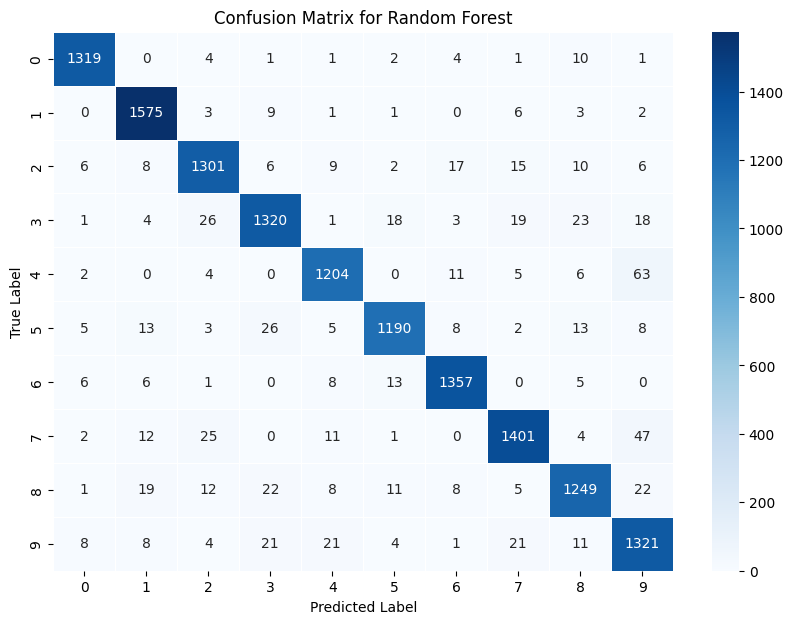

In [17]:
from sklearn.metrics import accuracy_score,  precision_score,recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate a model

def evaluate_model(name, model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    conf_matrix = confusion_matrix(y_test, predictions)
    
    # Display results
    print(f"Results for {name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
# Evaluate all models
evaluate_model("k-Nearest Neighbors", knn, X_test, y_test)
evaluate_model("Support Vector Machine", svm, X_test, y_test)
evaluate_model("Decision Tree", decision_tree, X_test, y_test)
evaluate_model("Random Forest", random_forest, X_test, y_test)
    

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# X_train, y_train, X_test, y_test are already defined and preprocessed

# Initialize the individual models with optimized parameter
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
decision_tree = DecisionTreeClassifier (max_depth=10 , random_state=42)
svm = SVC(gamma='scale', probability=True, random_state=42) # alwasy check probability is True for voting

# Create the ensemble model using voting
ensemble = VotingClassifier(estimators=[
    ('random_forest', random_forest),
    ('decision_tree', decision_tree),
    ('svm', svm)
], voting='soft')    # 'soft' voting uses probabilities to predict the class labels

# Train the ensemble model
ensemble.fit(X_train,y_train)
print("Trained Ensemble Model")


# Evaluate the ensemble model on training data
train_predictions = ensemble.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='macro')
train_recall = recall_score(y_train, train_predictions, average='macro')
train_f1 = f1_score(y_train, train_predictions, average='macro')

# Evaluate the ensemble model on test data
test_predictions = ensemble.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='macro')
test_recall = recall_score(y_test, test_predictions, average= 'macro')
test_f1 = f1_score(y_test, test_predictions, average='macro')

# Print results
print("\nEnsemble Model Performance on Training Data:")
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)

print("\nEnsemble Model Performance on Test Data:")
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)

# Print classification report for test data
print("\nClassification Report for Ensemble Model on Test Data:")
print(classification_report(y_test, test_predictions))


# Plot confusion matrix for test data
conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, cmap="Blues")
plt

Trained Ensemble Model

Ensemble Model Performance on Training Data:
Training Accuracy: 0.98375
Training Precision: 0.9837935179629962
Training Recall: 0.9836530299714312
Training F1 Score: 0.9837148252332459

Ensemble Model Performance on Test Data:
Test Accuracy: 0.9624285714285714
Test Precision: 0.9623992103376316
Test Recall: 0.9620098130970746
Test F1 Score: 0.9621691055115056

Classification Report for Ensemble Model on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.97      0.99      0.98      1600
           2       0.96      0.96      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.96      0.96      1295
           5       0.96      0.95      0.96      1273
           6       0.97      0.98      0.97      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.94      0.95      1357
           9     